In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

# Load preprocessed user-bias data
df = pd.read_csv("user_bias_summary.csv")

# Bias list
bias_list = [
    "Loss Aversion", "Overconfidence", "Confirmation Bias", "Anchoring",
    "Herd Behavior", "Status Quo Bias", "Disposition Effect", "Regret Aversion",
    "Self-Attribution Bias", "Framing Effect", "Mental Accounting", "Recency Bias",
    "Affect Heuristic", "Sunk Cost Fallacy", "Present Bias", "Authority Bias"
]

# Ensure numeric
df[bias_list] = df[bias_list].apply(pd.to_numeric, errors='coerce').fillna(0)




In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import skew, kurtosis
import numpy as np

# Load data
df = pd.read_csv("user_bias_summary.csv")

# List of bias traits (columns except user_name)
bias_list = [col for col in df.columns if col != "user_name"]


In [12]:
from scipy.stats import skew, kurtosis

data = df['Overconfidence']
print("Skewness:", skew(data))
print("Kurtosis:", kurtosis(data))


Skewness: 1.7665484279904193
Kurtosis: 4.275991244416251


Top 10 most common top 2 bias pairs across users

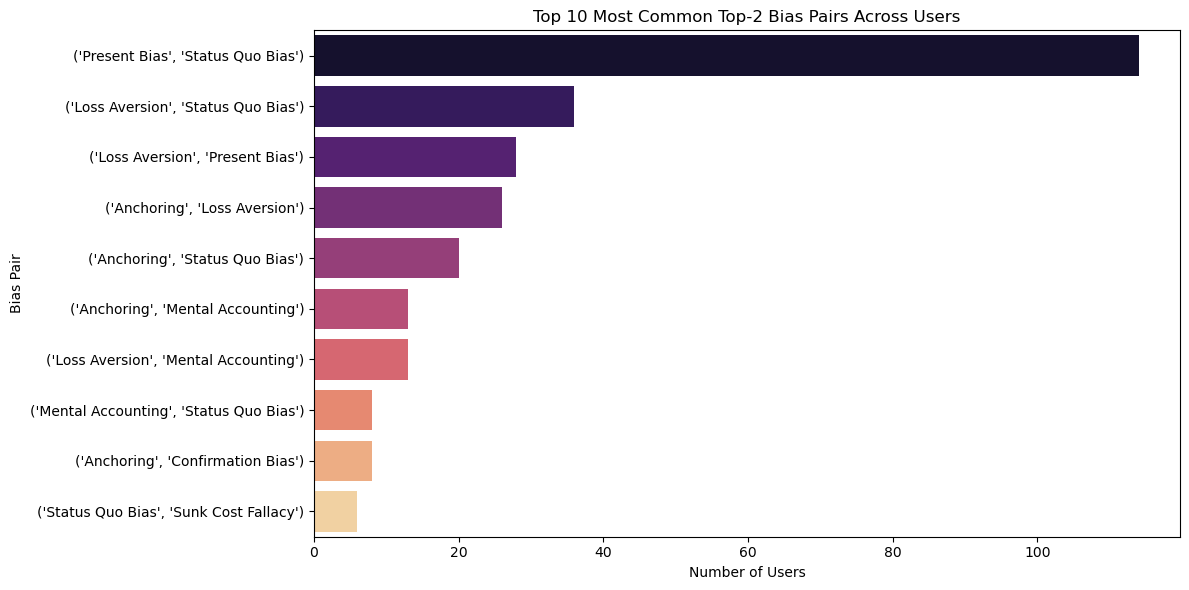

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(data=pair_df.head(10), x="Count", y="Bias Pair", palette="magma")
plt.title("Top 10 Most Common Top-2 Bias Pairs Across Users")
plt.xlabel("Number of Users")
plt.ylabel("Bias Pair")
plt.tight_layout()
plt.show()


In [13]:
# Compute correlation matrix (Pearson by default)
corr_matrix = df[bias_list].corr()


Correlation Matrix of Bias Traits

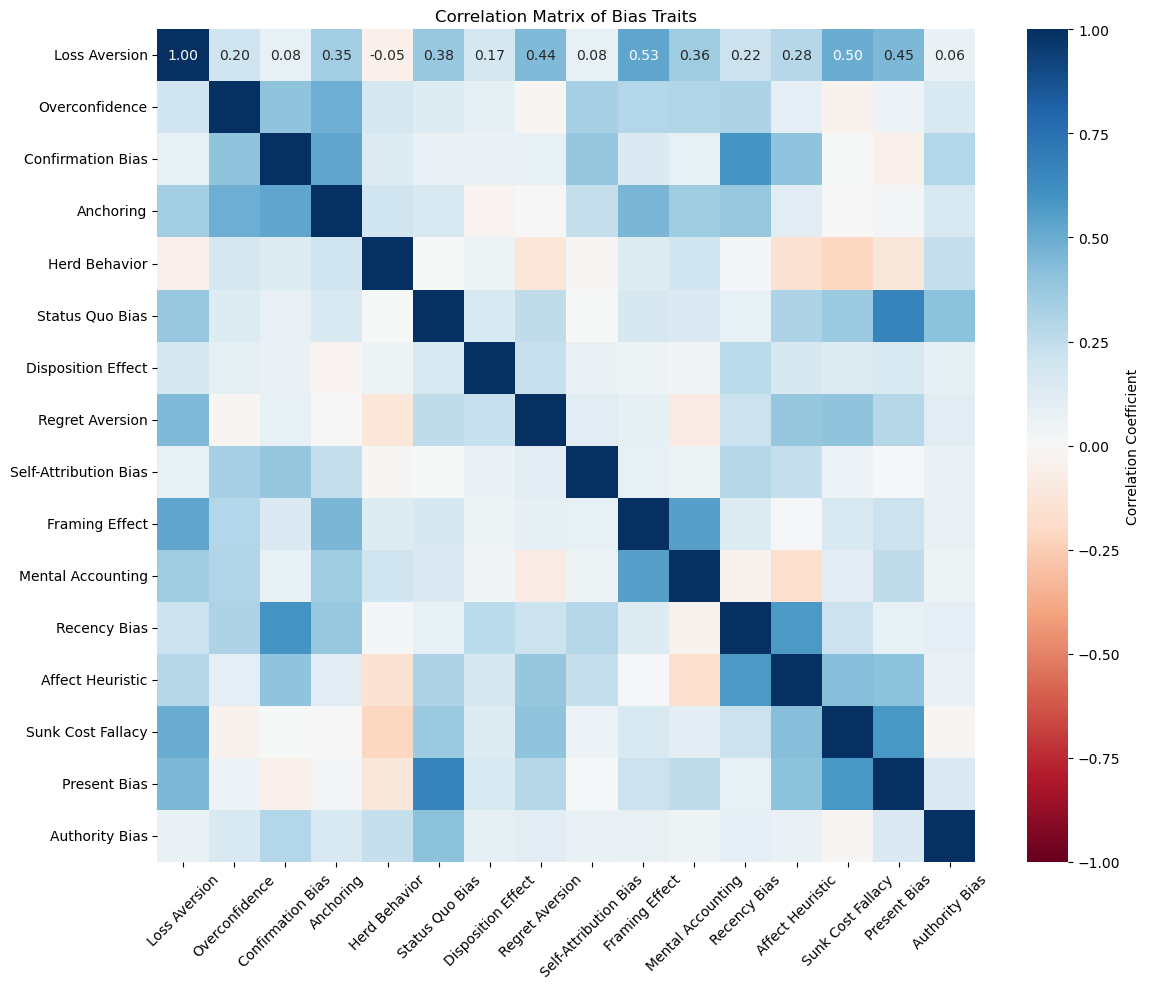

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', center=0, vmin=-1, vmax=1, fmt=".2f",
            cbar_kws={"label": "Correlation Coefficient"})
plt.title("Correlation Matrix of Bias Traits")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [14]:
# Flatten the matrix
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["Bias 1", "Bias 2", "Correlation"]

# Sort by absolute correlation
sorted_corr = corr_pairs.sort_values(by="Correlation", ascending=False)
high_pos = sorted_corr[sorted_corr["Correlation"] >= 0.5]
high_neg = sorted_corr[sorted_corr["Correlation"] <= -0.2]


In [15]:
print("🔺 Highly Positively Correlated Bias Pairs (corr ≥ 0.5):")
print(high_pos.to_string(index=False))

print("\n🔻 Highly Negatively Correlated Bias Pairs (corr ≤ -0.2):")
print(high_neg.to_string(index=False))


🔺 Highly Positively Correlated Bias Pairs (corr ≥ 0.5):
           Bias 1            Bias 2  Correlation
  Status Quo Bias      Present Bias     0.670881
Confirmation Bias      Recency Bias     0.596013
Sunk Cost Fallacy      Present Bias     0.582097
     Recency Bias  Affect Heuristic     0.575901
   Framing Effect Mental Accounting     0.551322
Confirmation Bias         Anchoring     0.527536
    Loss Aversion    Framing Effect     0.525904

🔻 Highly Negatively Correlated Bias Pairs (corr ≤ -0.2):
       Bias 1            Bias 2  Correlation
Herd Behavior Sunk Cost Fallacy    -0.213504


In [16]:
# --- 1. Total Bias Sum Across All Users ---
total_per_bias = df[bias_list].sum().sort_values(ascending=False)
print("✅ Total sum of each bias across all users:")
print(total_per_bias)

# --- 2. Bias Count Per User (number of non-zero traits) ---
df["bias_count_per_user"] = df[bias_list].gt(0).sum(axis=1)

# Get min and max bias counts
min_bias = df["bias_count_per_user"].min()
max_bias = df["bias_count_per_user"].max()

print(f"\n🔻 Minimum number of biases present in any user: {min_bias}")
print(f"🔺 Maximum number of biases present in any user: {max_bias}")


✅ Total sum of each bias across all users:
Status Quo Bias          2645
Present Bias             2555
Loss Aversion            2021
Anchoring                1512
Mental Accounting        1304
Sunk Cost Fallacy        1026
Framing Effect            984
Affect Heuristic          795
Confirmation Bias         759
Authority Bias            619
Overconfidence            516
Regret Aversion           453
Recency Bias              453
Self-Attribution Bias     156
Herd Behavior             109
Disposition Effect         51
dtype: int64

🔻 Minimum number of biases present in any user: 2
🔺 Maximum number of biases present in any user: 16


Total Expression of Each Bias Across All Users

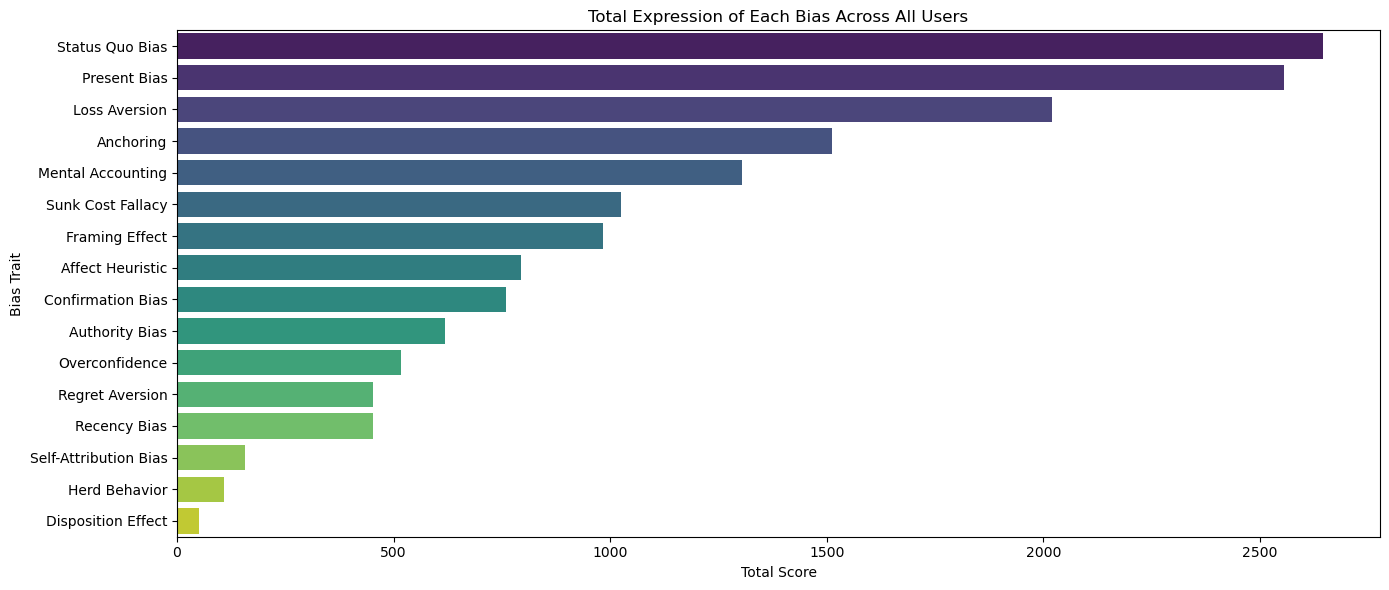

In [34]:
plt.figure(figsize=(14, 6))
sns.barplot(x=total_per_bias.values, y=total_per_bias.index, palette="viridis")
plt.title("Total Expression of Each Bias Across All Users")
plt.xlabel("Total Score")
plt.ylabel("Bias Trait")
plt.tight_layout()
plt.show()


C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


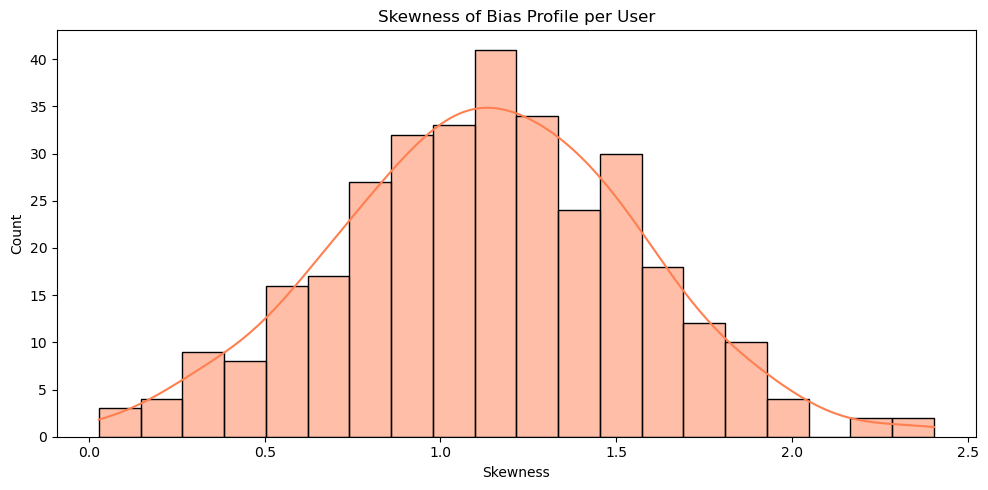

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(df['bias_skewness'], bins=20, color='coral', kde=True)
plt.title("Skewness of Bias Profile per User")
plt.xlabel("Skewness")
plt.tight_layout()
plt.show()


In [40]:
# --- 1. Number of Users Having Each Bias (Non-zero entries) ---
bias_user_presence = (df[bias_list] > 0).sum().sort_values(ascending=False)
print("✅ Number of users showing each bias at least once:")
print(bias_user_presence)

# --- 2. Bias Count Per User (number of non-zero traits) ---
df["bias_count_per_user"] = df[bias_list].gt(0).sum(axis=1)

# Get min and max bias counts
min_bias = df["bias_count_per_user"].min()
max_bias = df["bias_count_per_user"].max()

print(f"\n🔻 Minimum number of biases present in any user: {min_bias}")
print(f"🔺 Maximum number of biases present in any user: {max_bias}")


✅ Number of users showing each bias at least once:
Loss Aversion            319
Status Quo Bias          317
Present Bias             310
Mental Accounting        297
Anchoring                296
Framing Effect           288
Sunk Cost Fallacy        270
Confirmation Bias        252
Authority Bias           243
Affect Heuristic         222
Regret Aversion          212
Overconfidence           211
Recency Bias             206
Self-Attribution Bias    103
Herd Behavior             75
Disposition Effect        40
dtype: int64

🔻 Minimum number of biases present in any user: 2
🔺 Maximum number of biases present in any user: 16


In [41]:
from scipy.stats import skew
import pandas as pd

# Load your already processed user-level bias data
df = pd.read_csv("user_bias_summary.csv")

# Identify bias columns
bias_list = [col for col in df.columns if col != "user_name"]

# Compute skewness per user
df["bias_skewness"] = df[bias_list].apply(skew, axis=1)

# Show a few rows
print(df[["user_name", "bias_skewness"]])


               user_name  bias_skewness
0                4Runnnn       1.074963
1            99JustAsIAm       2.172579
2                  APXZX       0.651777
3         ActualSnow8383       1.302602
4    ActuaryPersonal2378       1.051635
..                   ...            ...
321           xXVoicesXx       1.264358
322                xyeLz       1.427488
323    y0ungprofessional       0.460286
324    yeetboi_dangerous       0.688042
325           yummsushii       2.404129

[326 rows x 2 columns]


C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


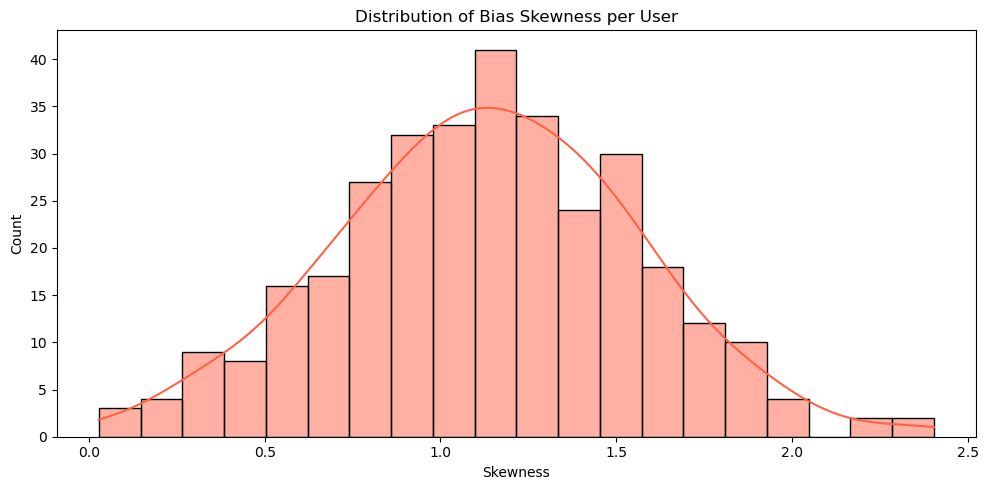

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["bias_skewness"], bins=20, kde=True, color="tomato")
plt.title("Distribution of Bias Skewness per User")
plt.xlabel("Skewness")
plt.tight_layout()
plt.show()


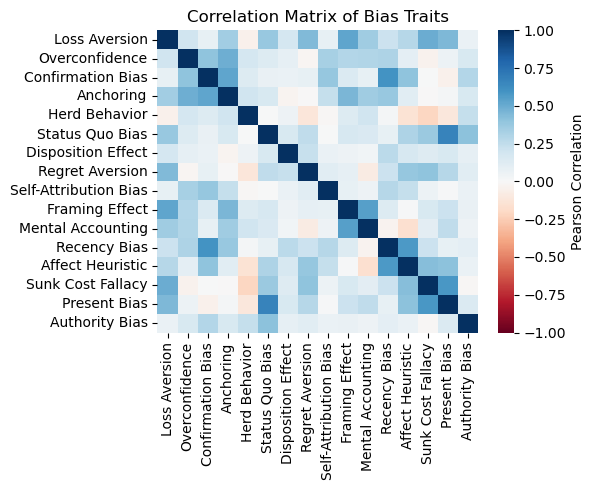

In [43]:
plt.figure(figsize=(6, 5))
sns.heatmap(df[bias_list].corr(), annot=False, cmap='RdBu', center=0, fmt=".2f", vmin=-1, vmax=1,
            cbar_kws={"label": "Pearson Correlation"})
plt.title("Correlation Matrix of Bias Traits")
plt.tight_layout()
# plt.savefig("plots/08_bias_correlation_heatmap.png")
# plt.close()


In [44]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colormap: white → blue → red → black
custom_cmap = LinearSegmentedColormap.from_list(
    "white_blue_red_black",
    [
        (0.0, "#ffffff"),   # white at 0.0
        (0.7, "#ff0000"),   # red at 0.7
        (1.0, "#000000")    # black at 1.0
    ]
)

# Plot the heatmap using this colormap
plt.figure(figsize=(6, 5))
sns.heatmap(norm_co_matrix, cmap=custom_cmap, square=True,
            cbar_kws={"label": "Normalized Co-occurrence"}, vmin=0, vmax=1)
plt.title("Bias Pair Co-occurrence")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


NameError: name 'norm_co_matrix' is not defined

<Figure size 600x500 with 0 Axes>

In [45]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[bias_list], orient="h", palette="vlag")
plt.title("Boxplot of Bias Trait Distributions Across Users")
plt.xlabel("Trait Value")
plt.tight_layout()
plt.savefig("plots/10_bias_boxplot_all_traits.png")
plt.close()


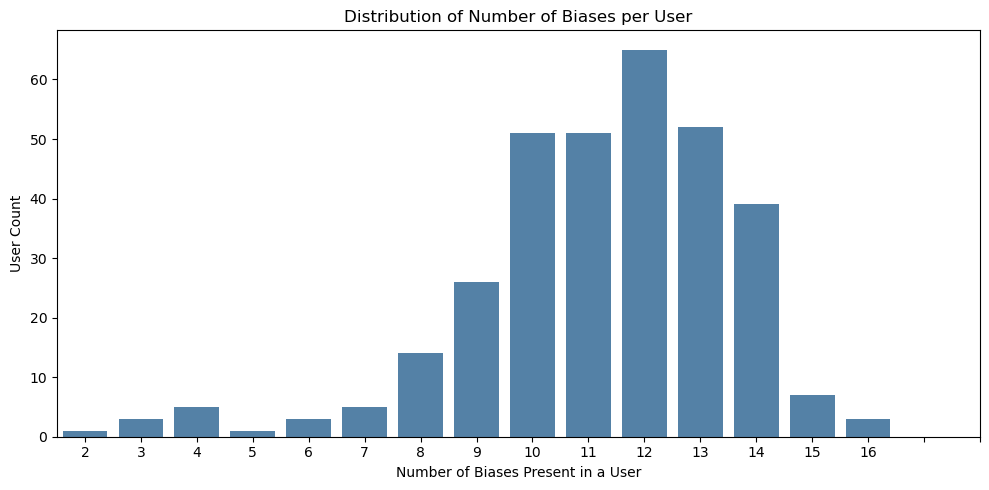

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count number of non-zero biases per user
df["bias_count_per_user"] = df[bias_list].gt(0).sum(axis=1)

# Step 2: Count how many users fall into each bias count (0–16)
bias_count_dist = df["bias_count_per_user"].value_counts().sort_index()

# Step 3: Plot user count
plt.figure(figsize=(10, 5))
sns.barplot(x=bias_count_dist.index, y=bias_count_dist.values, color="steelblue")
plt.title("Distribution of Number of Biases per User")
plt.xlabel("Number of Biases Present in a User")
plt.ylabel("User Count")
plt.xticks(range(0, 17))
plt.tight_layout()
plt.savefig("plots/15_bias_count_user_distribution.png")
plt.show()


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Recalculate if needed
df["bias_count_per_user"] = df[bias_list].gt(0).sum(axis=1)
bias_count_dist = df["bias_count_per_user"].value_counts().sort_index()
prob_dist = bias_count_dist / len(df)

# Standardize (0-1) using MinMaxScaler
scaler = MinMaxScaler()
prob_std = pd.Series(scaler.fit_transform(prob_dist.values.reshape(-1, 1)).flatten(), 
                     index=prob_dist.index)


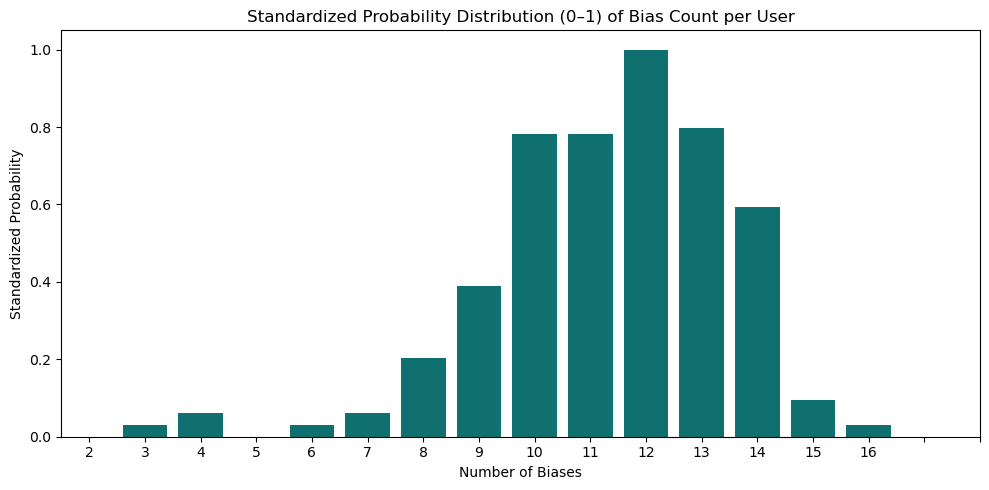

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(x=prob_std.index, y=prob_std.values, color="teal")
plt.title("Standardized Probability Distribution (0–1) of Bias Count per User")
plt.xlabel("Number of Biases")
plt.ylabel("Standardized Probability")
plt.xticks(range(0, 17))

plt.tight_layout()
plt.savefig("plots/16_standardized_bias_count_distribution.png")
plt.show()


In [53]:
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[bias_list]), columns=bias_list)


C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

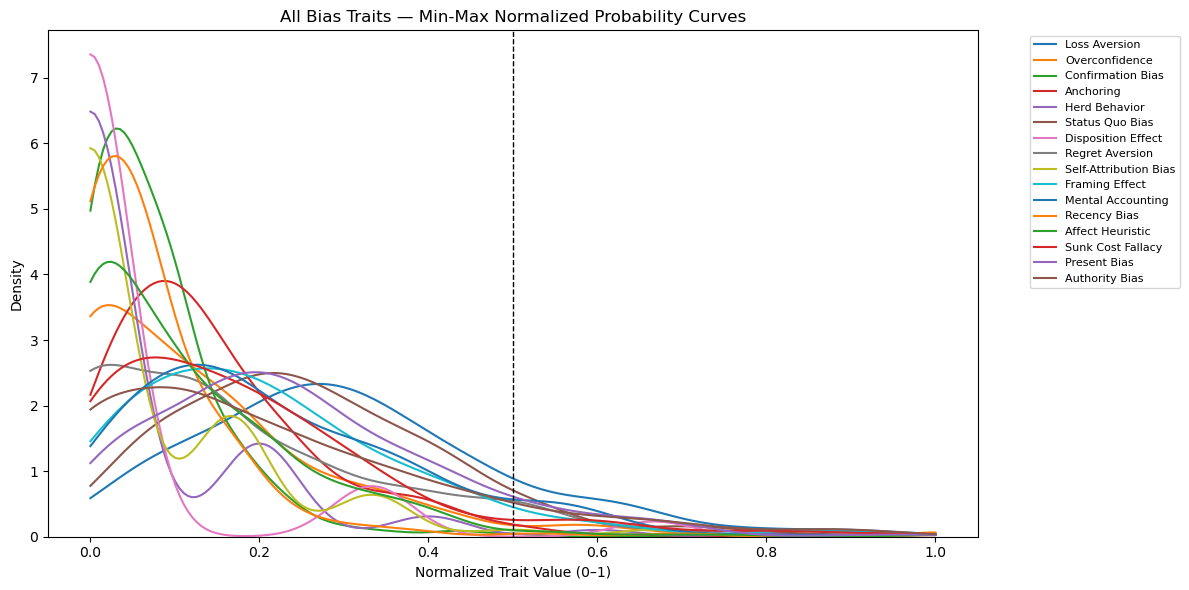

In [54]:
plt.figure(figsize=(12, 6))

for col in bias_list:
    sns.kdeplot(df_norm[col], label=col, linewidth=1.5,clip=(0,1))

plt.axvline(0.5, color='black', linestyle='--', linewidth=1)  # Center line
plt.title("All Bias Traits — Min-Max Normalized Probability Curves")
plt.xlabel("Normalized Trait Value (0–1)")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig("plots/17_all_bias_minmax_pdf_combined.png")
plt.show()


C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

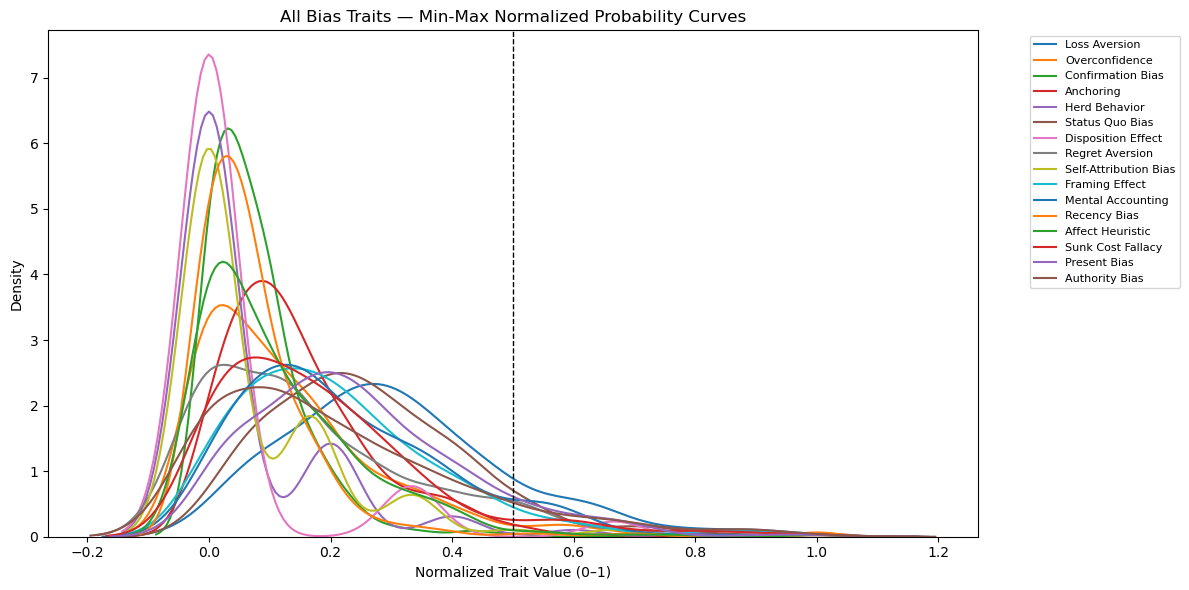

In [55]:
plt.figure(figsize=(12, 6))

for col in bias_list:
    sns.kdeplot(df_norm[col], label=col, linewidth=1.5)

plt.axvline(0.5, color='black', linestyle='--', linewidth=1)  # Center line
plt.title("All Bias Traits — Min-Max Normalized Probability Curves")
plt.xlabel("Normalized Trait Value (0–1)")
plt.ylabel("Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig("plots/17_all_bias_minmax_pdf_combined.png")
plt.show()


In [56]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ensure output folder exists
os.makedirs("plots/individual_bias_pdfs", exist_ok=True)

# Normalize all trait columns to [0,1]
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[bias_list]), columns=bias_list)

# Plot and save each bias trait's PDF
for col in bias_list:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_norm[col], fill=True, clip=(0, 1), color='steelblue', linewidth=2)
    plt.axvline(0.5, color='black', linestyle='--', linewidth=1)
    plt.xlim(0, 1)
    plt.ylim(bottom=0)
    plt.title(f"Probability Distribution of {col} (Normalized 0–1)")
    plt.xlabel("Normalized Value")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"plots/individual_bias_pdfs/{col.replace(' ', '_')}_pdf.png")
    plt.close()


C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91875\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

<Figure size 640x480 with 0 Axes>

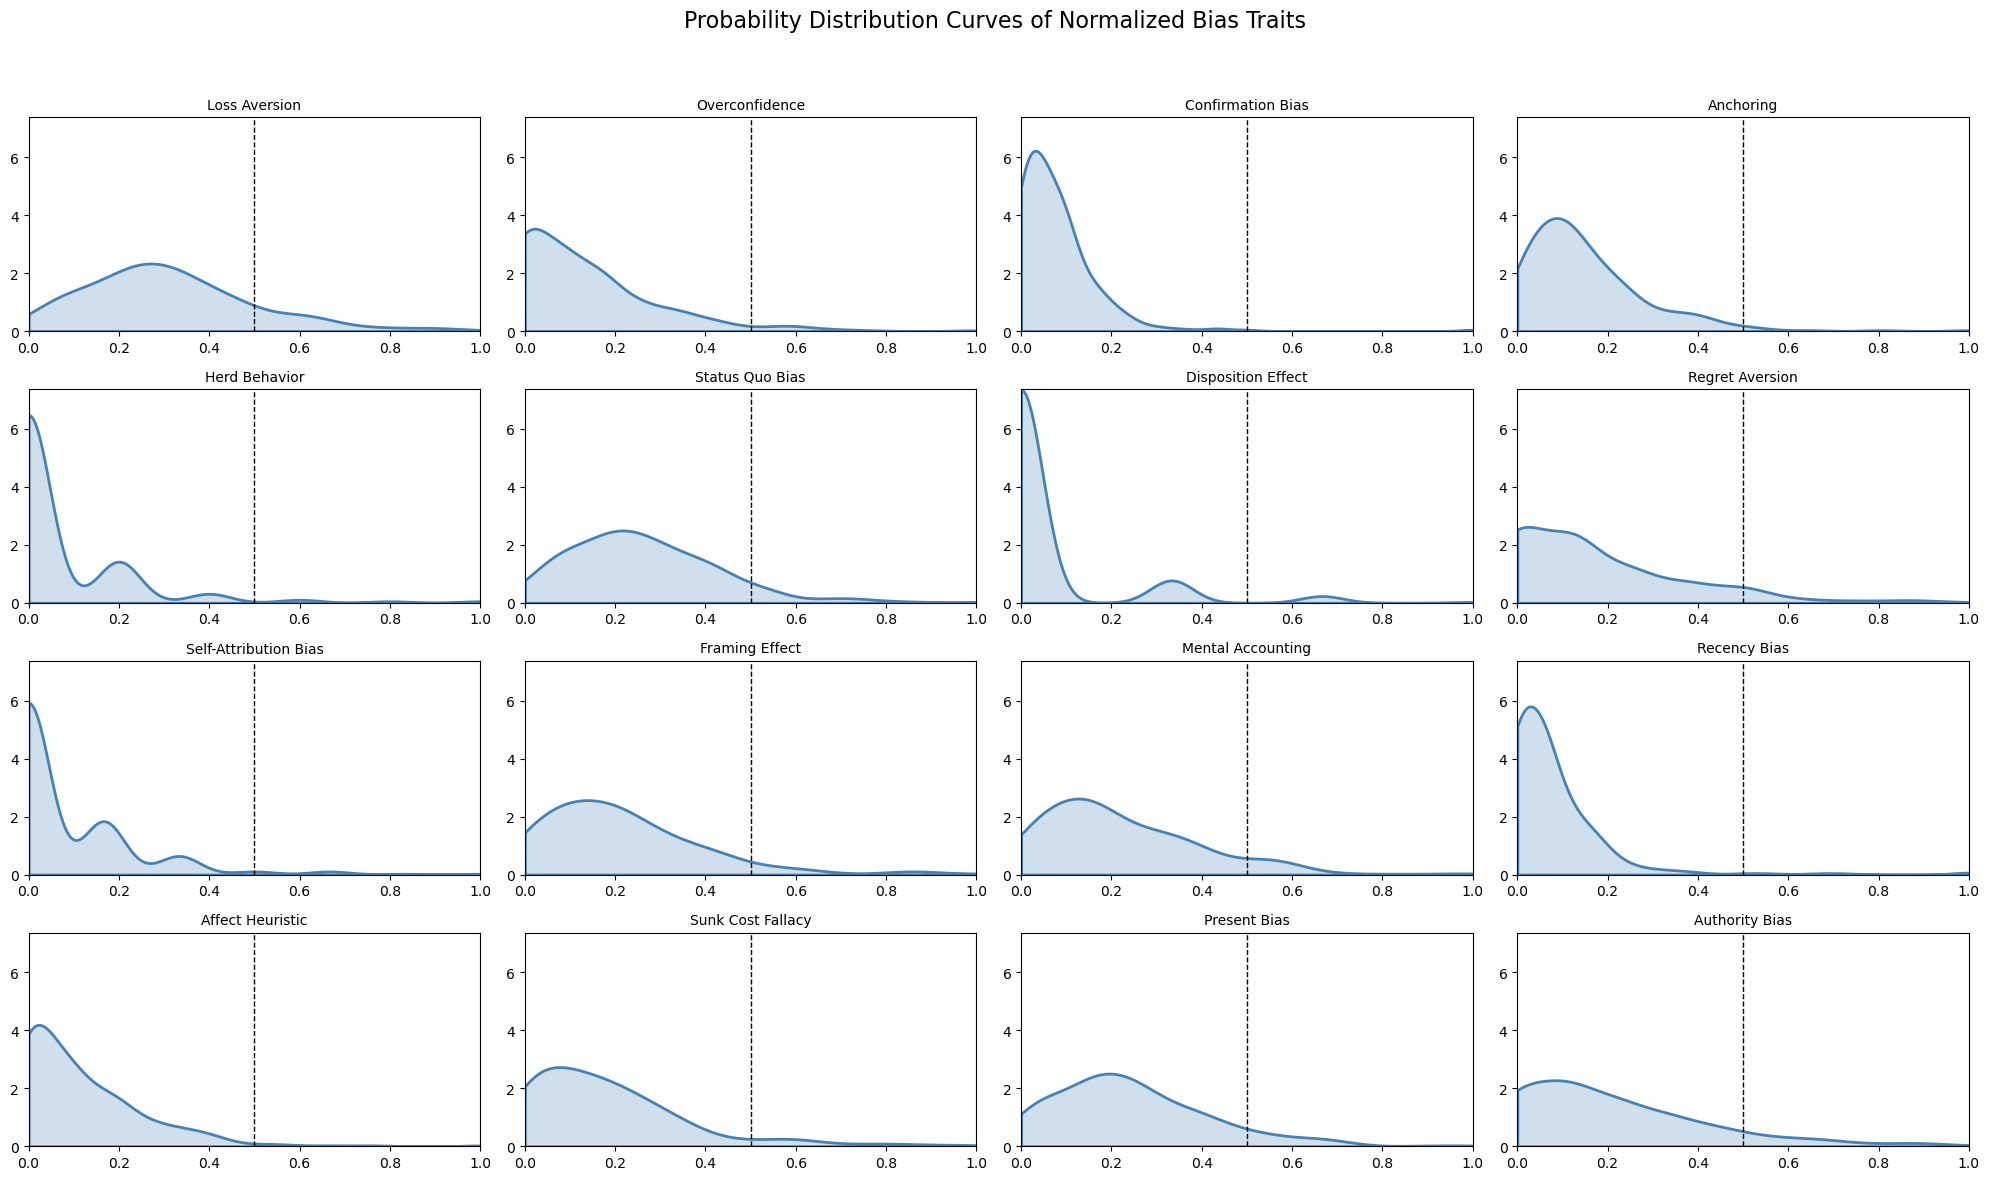

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Step 1: Normalize bias traits to 0–1
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df[bias_list]), columns=bias_list)

# Step 2: Find maximum y-limit across all KDEs (so all plots have same y-axis)
max_y = 0
for col in bias_list:
    kde = sns.kdeplot(df_norm[col], clip=(0, 1))
    max_y = max(max_y, max([line.get_ydata().max() for line in kde.lines]))
    plt.clf()  # Clear after checking

# Step 3: Plot all curves with fixed x/y limits
plt.figure(figsize=(20, 12))

for i, col in enumerate(bias_list):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(df_norm[col], fill=True, clip=(0, 1), color='steelblue', linewidth=2)
    plt.axvline(0.5, color='black', linestyle='--', linewidth=1)
    plt.xlim(0, 1)
    plt.ylim(0, max_y + 0.02)
    plt.title(col, fontsize=10)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Probability Distribution Curves of Normalized Bias Traits", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


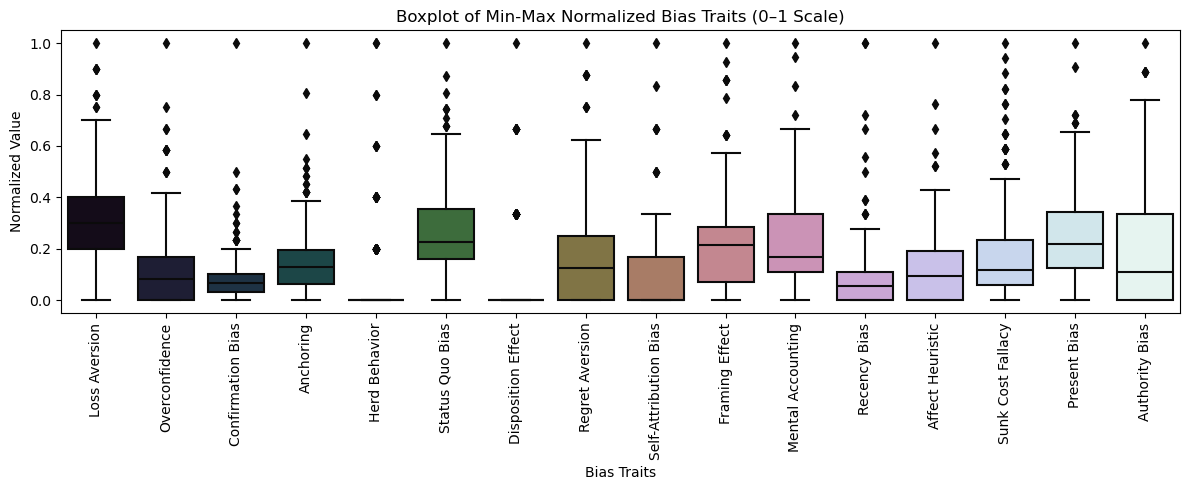

In [58]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df_norm, orient="v", palette="cubehelix")
plt.title("Boxplot of Min-Max Normalized Bias Traits (0–1 Scale)")
plt.ylabel("Normalized Value")
plt.xlabel("Bias Traits")
plt.xticks(rotation=90)
plt.tight_layout()
# plt.savefig("plots/12_bias_boxplot_normalized_v.png")
plt.show()  # not just plt — ensures it's rendered inline


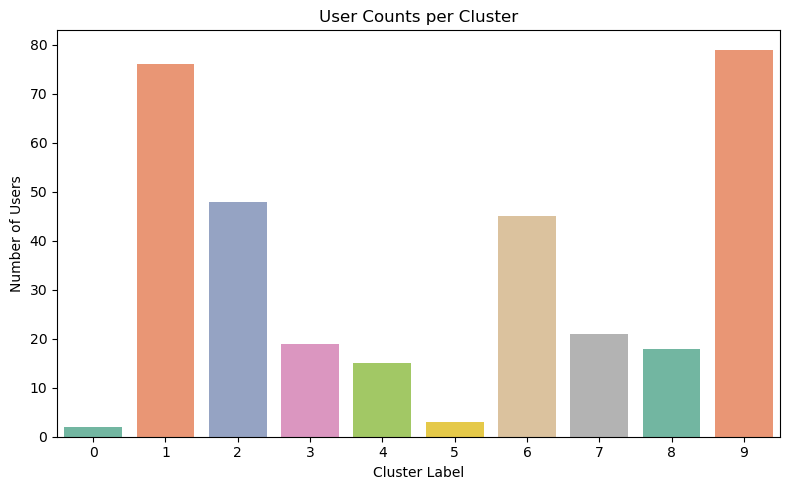

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Standardize traits (0 mean, 1 std)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[bias_list])

# Step 2: KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 3: Visualize cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='cluster', data=df, palette='Set2')
plt.title("User Counts per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()


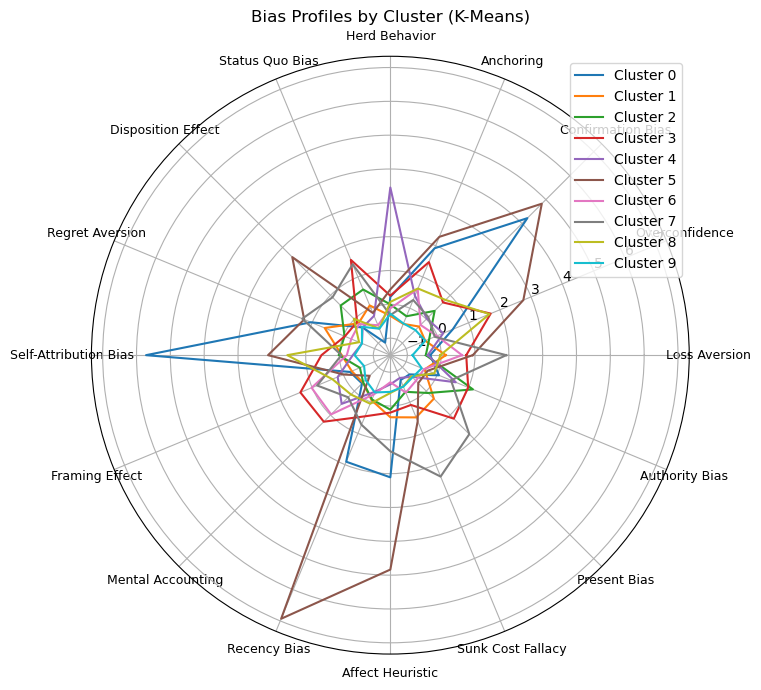

In [60]:
import numpy as np

# Get cluster centers
cluster_profiles = pd.DataFrame(kmeans.cluster_centers_, columns=bias_list)

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(bias_list), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(10, 7))
for i in range(cluster_profiles.shape[0]):
    values = cluster_profiles.iloc[i].tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}')

plt.xticks(angles[:-1], bias_list, fontsize=9)
plt.title("Bias Profiles by Cluster (K-Means)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


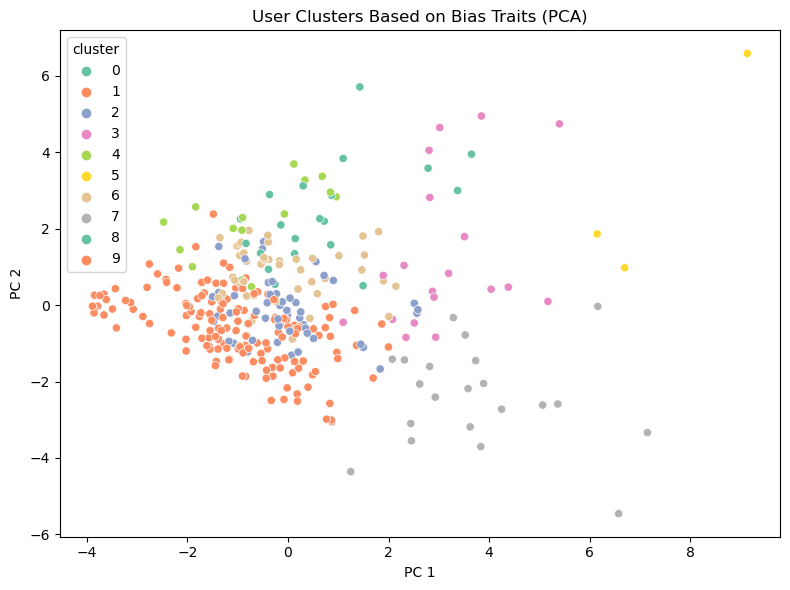

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['cluster'], palette='Set2')
plt.title("User Clusters Based on Bias Traits (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.tight_layout()
plt.show()


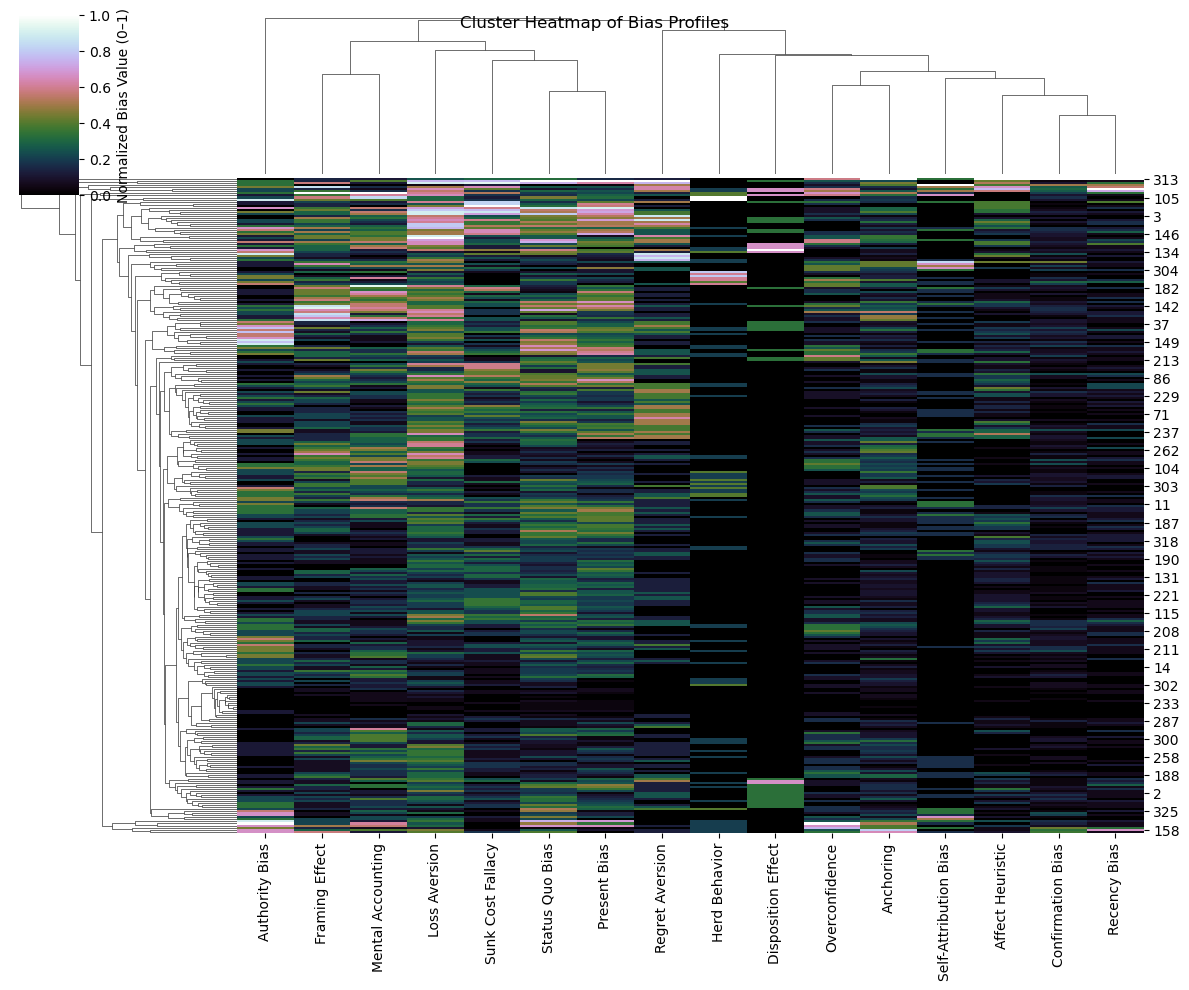

In [62]:
sns.clustermap(df_norm, cmap="cubehelix", figsize=(12, 10), 
               col_cluster=True, row_cluster=True,
               cbar_kws={"label": "Normalized Bias Value (0–1)"})
plt.suptitle("Cluster Heatmap of Bias Profiles")
plt.show()


<Axes: >

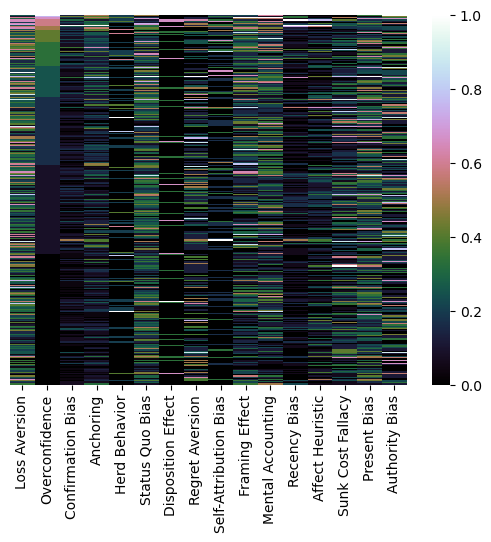

In [63]:
df_sorted = df_norm.sort_values(by="Overconfidence", ascending=False)
sns.heatmap(df_sorted, cmap="cubehelix", yticklabels=False)


In [64]:
iqr_ranges = df_norm.quantile([0.25, 0.75])
q1 = iqr_ranges.loc[0.25]
q3 = iqr_ranges.loc[0.75]


In [65]:
# Inside IQR → 1 (dark), Outside → 0 (light)
in_iqr_mask = df_norm.apply(lambda col: col.between(q1[col.name], q3[col.name]), axis=0).astype(int)


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(in_iqr_mask, cmap=["#eeeeee", "#003366"],  # light gray to dark blue
            cbar=False, xticklabels=True, yticklabels=False)
plt.title("Bias Trait Range Heatmap (Dark = Within IQR, Light = Outside)")
plt.xlabel("Bias Traits")
plt.ylabel("Users")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
